# Machine Learning - P2

### 2.2 Performance Estimation Methodologies

 - Read the Hotel Reservation data set in a new notebook into a data frame.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

df = pd.read_csv('../HotelReservations.csv')

 - For the set of predictors, select the columns 'required_car_parking_space',
'lead_time', 'repeated_guest', 'avg_price_per_room' and those whose name starts
with 'no_of_'.

In [11]:
no_of_list = [col for col in df if col.startswith('no_of')]

no_of_list

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'no_of_special_requests']

In [12]:
pred_columns = no_of_list + ['required_car_parking_space', 'lead_time', 'repeated_guest', 'avg_price_per_room']

predictors = df[pred_columns]

In [13]:
predictors

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,required_car_parking_space,lead_time,repeated_guest,avg_price_per_room
0,2,0,1,2,0,0,0,0,224,0,65.00
1,2,0,2,3,0,0,1,0,5,0,106.68
2,1,0,2,1,0,0,0,0,1,0,60.00
3,2,0,0,2,0,0,0,0,211,0,100.00
4,2,0,1,1,0,0,0,0,48,0,94.50
...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,1,0,85,0,167.80
36271,2,0,1,3,0,0,2,0,228,0,90.95
36272,2,0,2,6,0,0,2,0,148,0,98.39
36273,2,0,0,3,0,0,0,0,63,0,94.50


 - For the target variable, map column 'booking_status' values to 1 for
'Canceled' and 0 for 'Not Canceled'.

In [14]:
target = df['booking_status'].map(lambda x: 0 if x == 'Canceled' else 1)

target

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int64

 - Define a simple decision tree classifier with max_depth = 5. Check which split
criterion is set by default.

In [18]:
tree = DecisionTreeClassifier(max_depth=5)
tree.criterion

'gini'

 - Define a train/test split of the data set with a test size equal to 30%. Hint: use the
function 'train_test_split()'. Fit the decision tree classifier to the training data and
evaluate its accuracy on the test data. Hint: use the functions ‘fit()’, ‘predict()’ and
‘accuracy_score()’.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=1)

In [30]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [32]:
y_pred = tree.predict(X_test)

In [35]:
accuracy_score(y_true = y_test, y_pred = y_pred)

0.8101626389782229

 - Define a function that displays the confusion matrix and the accuracy, given a fitted
model, the predictors and the target of the test set, Hint: use the functions
'confusion_matrix()' and 'ConfusionMatrixDisplay()'.

In [42]:
def display_matrix(model, predictors, target):
    y_pred = model.predict(predictors)
    print('Accuracy = ', accuracy_score(y_true = target, y_pred = y_pred))
    cm = confusion_matrix(target, y_pred)
    ConfusionMatrixDisplay(cm).plot()

Accuracy =  0.8101626389782229


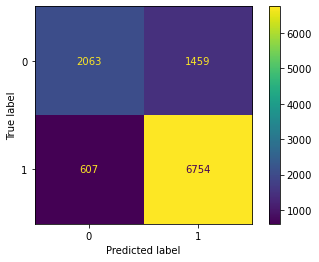

In [43]:
display_matrix(tree, X_test, y_test)

 - Define a function that plots the ROC curve and respective AUC, given a fitted model,
the predictors and the target of the test set. Hint: use the functions ‘predict_proba()’,
‘roc_curve()’ and ‘roc_auc_score()’

In [51]:
def plot_roc_curve(model, X_test, y_test):
        y_pred_prob = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
        auc = roc_auc_score(y_test, y_pred_prob[:, 1])

        #plot ROC curve
        plt.plot(fpr, tpr, label='AUC='+str(round(auc,3)))
        plt.plot(np.linspace(0,1,5), np.linspace(0,1,5))
        plt.title('ROC Curve')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc=4)
        plt.show()

In [52]:
plot_roc_curve(tree, X_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [10883, 1]